In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Reading directory and listing files


In [2]:
directory = "data"
file_count = 0
with os.scandir(directory) as entries:
    for entry in entries:
        print(entry.name)
        if entry.is_file():
            file_count +=1
print("There is:", file_count," files")


OtomotoScraper_20230921T161215862243_dolnoslaskie_searchfilter_enum_fuel_typediesel.csv
OtomotoScraper_20230921T161215862243_dolnoslaskie_searchfilter_enum_fuel_typepetrol.csv
OtomotoScraper_20230921T161215862243_kujawsko-pomorskie_searchfilter_enum_fuel_typediesel.csv
OtomotoScraper_20230921T161215862243_kujawsko-pomorskie_searchfilter_enum_fuel_typepetrol.csv
OtomotoScraper_20230921T161215862243_lodzkie_searchfilter_enum_fuel_typediesel.csv
OtomotoScraper_20230921T161215862243_lodzkie_searchfilter_enum_fuel_typepetrol.csv
OtomotoScraper_20230921T161215862243_lubelskie_searchfilter_enum_fuel_typediesel.csv
OtomotoScraper_20230921T161215862243_lubelskie_searchfilter_enum_fuel_typepetrol.csv
OtomotoScraper_20230921T161215862243_lubuskie_searchfilter_enum_fuel_typediesel.csv
OtomotoScraper_20230921T161215862243_lubuskie_searchfilter_enum_fuel_typepetrol.csv
OtomotoScraper_20230921T161215862243_malopolskie_searchfilter_enum_fuel_typediesel.csv
OtomotoScraper_20230921T161215862243_malopols

# Reading files from directory, adding date column, location and saving to list all dataframes


In [3]:
def read_csv_and_add_column(file_name):
    # Here the full file name is shortened to only date and then extract year etc.
    date_info = file_name.split("_")[1].split("T")[0]
    year = int(date_info[:4])
    month = int(date_info[4:6])
    day = int(date_info[6:8])
    column_date = dt.datetime(year, month, day)
    # Selecting right destination of data, reading and returning df
    folder = "data/"
    file_path = folder + file_name
    df = pd.read_csv(file_path)
    df['Date'] = column_date
    return df
    


df_list = []

with os.scandir(directory) as entries:
    for entry in entries:
        file_name = (entry.name)
        df = read_csv_and_add_column(file_name)
        df_list.append(df)


       

        


# Merging dataframes to single one

In [4]:
cars = pd.concat(df_list, ignore_index=True)

In [5]:
cars
# The region column consist of to city and provinence in paranthesese so it could be splitted to 2 different columns
# Some of the region has value 'leasing' so it could have it's own column

,Unnamed: 0,name,url,is_highlighted,mileage,gearbox,year,fuel_type,price,currency,price_placement,seller,region,details,Date
0,0,Mercedes-Benz Klasa S 400 d 4-Matic L AMG Line...,https://www.otomoto.pl/osobowe/oferta/mercedes...,False,15 100 km,Automatyczna,2022,Diesel,699 900,PLN,Powyżej średniej,NaN,Wrocław (Dolnośląskie),"2 925 cm3 • 330 KM • 4M, AMG, Distronic, Panor...",2023-09-21
1,1,Land Rover Range Rover Sport S 3.0 D HSE Dynamic,https://www.otomoto.pl/osobowe/oferta/land-rov...,False,5 000 km,Automatyczna,2023,Diesel,659 900,PLN,W granicach średniej,NaN,Długołęka (Dolnośląskie),2 997 cm3 • 300 KM • DYNAMIC HSE 3.0-litrowy 6...,2023-09-21
2,2,BMW Seria 7 740d xDrive mHEV M Sport sport,https://www.otomoto.pl/osobowe/oferta/bmw-seri...,False,8 000 km,Automatyczna,2022,Diesel,639 000,PLN,W granicach średniej,NaN,Długołęka (Dolnośląskie),2 993 cm3 • 286 KM • BMW 740d xdrive/Dostępny ...,2023-09-21
3,3,DACIA Dokker 1.5 dCi Laureate,https://otomotoklik.pl/oferta/UU10SDCJ55955082...,False,161 259 km,NaN,2017,Diesel,43 900,PLN,NaN,NaN,Leasing,1461 cm3,2023-09-21
4,4,BMW X5,https://www.otomoto.pl/osobowe/oferta/bmw-x5-m...,False,6 751 km,Automatyczna,2023,Diesel,569 000,PLN,NaN,NaN,Wrocław (Dolnośląskie),2 993 cm3 • 286 KM • |MPakiet|Shadowline|Grzan...,2023-09-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92310,1504,Renault Clio 1.0 TCe Equilibre,https://www.otomoto.pl/osobowe/oferta/renault-...,False,3 200 km,Manualna,2022,Benzyna,15 900,PLN,NaN,Prywatny sprzedawca,Stargard Szczeciński (Zachodniopomorskie),999 cm3 • 90 KM,2023-09-21
92311,1505,Kia Stonic,https://www.otomoto.pl/osobowe/oferta/kia-ston...,False,7 500 km,Automatyczna,2022,Benzyna,14 000,PLN,NaN,Prywatny sprzedawca,Człopa (Zachodniopomorskie),998 cm3 • 100 KM • automat,2023-09-21
92312,1506,Peugeot 301,https://www.otomoto.pl/osobowe/oferta/peugeot-...,False,43 000 km,Manualna,2017,Benzyna,14 000,PLN,NaN,Prywatny sprzedawca,Szczecin (Zachodniopomorskie),"1 587 cm3 • 115 KM • Bardzo mały przebieg, sam...",2023-09-21
92313,1507,Peugeot 301 1.2 Pure Tech Access,https://www.otomoto.pl/osobowe/oferta/peugeot-...,False,279 000 km,Manualna,2015,Benzyna,11 900,PLN,NaN,Prywatny sprzedawca,Szczecin (Zachodniopomorskie),1 199 cm3 • 82 KM • Peugeot 301 1.2,2023-09-21


# Summary statistics

In [6]:

cars.info()
# There is need to change the mileage, price to int to explore further


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92315 entries, 0 to 92314
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       92315 non-null  int64         
 1   name             92315 non-null  object        
 2   url              92315 non-null  object        
 3   is_highlighted   92315 non-null  bool          
 4   mileage          92315 non-null  object        
 5   gearbox          89754 non-null  object        
 6   year             92315 non-null  int64         
 7   fuel_type        92315 non-null  object        
 8   price            92315 non-null  object        
 9   currency         92315 non-null  object        
 10  price_placement  70521 non-null  object        
 11  seller           43157 non-null  object        
 12  region           92315 non-null  object        
 13  details          92315 non-null  object        
 14  Date             92315 non-null  datet

In [7]:
cars.describe()

,Unnamed: 0,year,Date
count,92315.000000,92315.000000,92315
mean,2518.559638,2018.294719,2023-09-21 00:00:00
min,0.000000,2014.000000,2023-09-21 00:00:00
25%,722.000000,2017.000000,2023-09-21 00:00:00
50%,1722.000000,2018.000000,2023-09-21 00:00:00
75%,3734.000000,2020.000000,2023-09-21 00:00:00
max,11066.000000,2023.000000,2023-09-21 00:00:00
std,2329.823038,2.209269,NaN


In [8]:
cars.describe(include = 'object')
# Here we see that we need to check further unique values of gearbox, fuel_type, currency, price_placement, seller

# The details column is valuable beacause it contains specific informations about car - texts from this column should be 
# processed to extract valuable information
  


,name,url,mileage,gearbox,fuel_type,price,currency,price_placement,seller,region,details
count,92315,92315,92315,89754,92315,92315,92315,70521,43157,92315,92315
unique,16413,84995,31211,2,3,6488,2,3,2,4274,78128
top,Opel Astra,https://otomotoklik.pl/oferta/KNADB511AL636624...,150 000 km,Automatyczna,Benzyna,59 900,PLN,W granicach średniej,Prywatny sprzedawca,Warszawa (Mazowieckie),1199 cm3
freq,561,16,349,49743,51899,1112,92129,51887,42223,8014,240


In [9]:
cars.shape

(92315, 15)

# Checking nulls


In [10]:
cars.columns[np.sum(cars.isnull()) !=0]

D:\python_projects\scrapers-main\scrapers-main\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index(['gearbox', 'price_placement', 'seller'], dtype='object')

In [11]:
cars.columns[np.sum(cars.isnull()) ==0]

Index(['Unnamed: 0', 'name', 'url', 'is_highlighted', 'mileage', 'year',
       'fuel_type', 'price', 'currency', 'region', 'details', 'Date'],
      dtype='object')

# Checking unique values

In [12]:
for col in cars.columns:
    unique_count = cars[col].nunique()
    print(col + "   has: " + str(unique_count) + " unique values")

Unnamed: 0   has: 11067 unique values
name   has: 16413 unique values
url   has: 84995 unique values
is_highlighted   has: 2 unique values
mileage   has: 31211 unique values
gearbox   has: 2 unique values
year   has: 10 unique values
fuel_type   has: 3 unique values
price   has: 6488 unique values
currency   has: 2 unique values
price_placement   has: 3 unique values
seller   has: 2 unique values
region   has: 4274 unique values
details   has: 78128 unique values
Date   has: 1 unique values


In [13]:
cars['region'].unique()

array(['Wrocław (Dolnośląskie)', 'Długołęka (Dolnośląskie)', 'Leasing',
       ..., 'Mieszkowice (Zachodniopomorskie)',
       'Bełczna (Zachodniopomorskie)', 'Załom (Zachodniopomorskie)'],
      dtype=object)

In [14]:
cars['fuel_type'].unique()
 

array(['Diesel', 'Benzyna', 'Petrol'], dtype=object)

In [15]:
cars['currency'].unique()

array(['PLN', 'EUR'], dtype=object)

In [16]:
cars['gearbox'].unique()


array(['Automatyczna', nan, 'Manualna'], dtype=object)

In [17]:
cars['price_placement'].unique()

array(['Powyżej średniej', 'W granicach średniej', nan,
       'Poniżej średniej'], dtype=object)

In [18]:
cars['seller'].unique()

array([nan, 'Prywatny sprzedawca', 'Firma'], dtype=object)

Checking if there is any other distanance measures other than km


In [19]:
mileages = cars['mileage']
mileages
set_of_distance_measures = set()

for mileage in mileages:
    splitted_mileage = mileage.split(" ")
    distance_measure = splitted_mileage[-1]
    set_of_distance_measures.add(distance_measure)
    
print(set_of_distance_measures)




{'km'}


# Breaking region to city and provinence

In [20]:

cars[['city', 'provinence']] = cars['region'].str.split('(', expand=True)
cars['city'] = cars['city'].str.strip(' ')
cars['provinence'] = cars['provinence'].str.strip(' )')

cars.drop(columns=['region'], inplace=True)


# Changing column type mileage to int 

In [21]:
mileages = cars['mileage']

def mileage_to_int(mileage_as_str):
    mileage_as_int = int(mileage_as_str.replace('km','').replace(' ', ''))
    
    return mileage_as_int

cars['mileage'] = cars['mileage'].apply(mileage_to_int)


# Changing price column type to int

In [22]:
prices = cars['price']

def price_to_int(price_as_str):
    price_as_int = int(price_as_str.replace(' ', '').replace(' ', ''))
    return price_as_int
cars['price'] = cars['price'].apply(price_to_int)

# Changing unique column values to english version
        

In [23]:
mappings_gear = {
    'Automatyczna': 'automatic',
    'Manualna': 'manual'
}
mappings_fuel_type = {
    'Diesel': 'diesel',
    'Benzyna': 'gasolin',
    'Petrol': 'gasolin'
}
mappings_price_placement = {
    'Powyżej średniej': 'above_average',
    'Poniżej średniej': 'below_average',
    'W granicach średniej': 'within_average'
}
mappings_seller = {
    'Prywatny sprzedawca': 'private_person',
    'Firma': 'business'
}


def map_value_with_mapping(value, mappings):
    if value in mappings:
        return mappings[value]
    else:
        return value
def modify_column_with_mapping(column, mappings):
    return cars[column].apply(map_value_with_mapping, args = (mappings, ))
    
    

cars['gearbox'] = modify_column_with_mapping('gearbox', mappings_gear)
cars['fuel_type'] = modify_column_with_mapping('fuel_type', mappings_fuel_type)
cars['price_placement'] = modify_column_with_mapping('price_placement', mappings_price_placement)

# EUR to PLN conversion

In [24]:
euro_to_pln = 4.6


def convert_prices(row):
    if row['currency'] == 'EUR':
        print(row)
        return row['price'] * euro_to_pln
    else:
        return row['price']
def change_currency(row):
    if row['currency'] == 'EUR':
        return 'PLN'
    else:
        return row['currency']
cars['price'] = cars.apply(convert_prices, axis = 1)
cars['currency'] = cars.apply(change_currency, axis = 1)

Unnamed: 0                                                        33
name                                 Mercedes-Benz GLE 400 d 4-Matic
url                https://www.otomoto.pl/osobowe/oferta/mercedes...
is_highlighted                                                 False
mileage                                                        89782
gearbox                                                    automatic
year                                                            2021
fuel_type                                                     diesel
price                                                          92004
currency                                                         EUR
price_placement                                       within_average
seller                                                           NaN
details            2 925 cm3 • 330 KM • Mercedes-Benz GLE 400 d 4...
Date                                             2023-09-21 00:00:00
city                              

Unnamed: 0                                                      1018
name                                                     Nissan Juke
url                https://www.otomoto.pl/osobowe/oferta/nissan-j...
is_highlighted                                                 False
mileage                                                        98000
gearbox                                                       manual
year                                                            2017
fuel_type                                                    gasolin
price                                                           8900
currency                                                         EUR
price_placement                                                  NaN
seller                                           Prywatny sprzedawca
details            1 197 cm3 • 116 KM • Nissan Juke 2107 Bezwypad...
Date                                             2023-09-21 00:00:00
city                              

Unnamed: 0                                                      9808
name                                   Fiat Doblo 1.4 T-Jet 16V More
url                https://www.otomoto.pl/osobowe/oferta/fiat-dob...
is_highlighted                                                 False
mileage                                                         5400
gearbox                                                       manual
year                                                            2019
fuel_type                                                    gasolin
price                                                          10086
currency                                                         EUR
price_placement                                                  NaN
seller                                           Prywatny sprzedawca
details            1 368 cm3 • 120 KM • TYLKO 5000km Doblo 1,4 Tu...
Date                                             2023-09-21 00:00:00
city                              

Unnamed: 0                                                        38
name                                             Bentley Bentayga V8
url                https://www.otomoto.pl/osobowe/oferta/bentley-...
is_highlighted                                                 False
mileage                                                           30
gearbox                                                    automatic
year                                                            2023
fuel_type                                                    gasolin
price                                                         189000
currency                                                         EUR
price_placement                                                  NaN
seller                                           Prywatny sprzedawca
details                                           3 996 cm3 • 550 KM
Date                                             2023-09-21 00:00:00
city                              

# Summary statistics

In [25]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92315 entries, 0 to 92314
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       92315 non-null  int64         
 1   name             92315 non-null  object        
 2   url              92315 non-null  object        
 3   is_highlighted   92315 non-null  bool          
 4   mileage          92315 non-null  int64         
 5   gearbox          89754 non-null  object        
 6   year             92315 non-null  int64         
 7   fuel_type        92315 non-null  object        
 8   price            92315 non-null  float64       
 9   currency         92315 non-null  object        
 10  price_placement  70521 non-null  object        
 11  seller           43157 non-null  object        
 12  details          92315 non-null  object        
 13  Date             92315 non-null  datetime64[us]
 14  city             92315 non-null  objec

In [26]:
cars.describe()

,Unnamed: 0,mileage,year,price,Date
count,92315.000000,9.231500e+04,92315.000000,9.231500e+04,92315
mean,2518.559638,9.785046e+04,2018.294719,1.123761e+05,2023-09-21 00:00:00
min,0.000000,1.000000e+00,2014.000000,5.000000e+02,2023-09-21 00:00:00
25%,722.000000,4.400000e+04,2017.000000,5.590000e+04,2023-09-21 00:00:00
50%,1722.000000,8.800000e+04,2018.000000,8.100000e+04,2023-09-21 00:00:00
75%,3734.000000,1.422425e+05,2020.000000,1.290270e+05,2023-09-21 00:00:00
max,11066.000000,2.600000e+06,2023.000000,4.137700e+06,2023-09-21 00:00:00
std,2329.823038,6.835760e+04,2.209269,1.226509e+05,NaN


In [27]:
cars.describe(include='object')

,name,url,gearbox,fuel_type,currency,price_placement,seller,details,city,provinence
count,92315,92315,89754,92315,92315,70521,43157,92315,92315,89769
unique,16413,84995,2,2,1,3,2,78128,3999,16
top,Opel Astra,https://otomotoklik.pl/oferta/KNADB511AL636624...,automatic,gasolin,PLN,within_average,Prywatny sprzedawca,1199 cm3,Warszawa,Mazowieckie
freq,561,16,49743,53035,92315,51887,42223,240,8016,18403


# Data distribution

In [28]:
cars['fuel_type'].unique()

array(['diesel', 'gasolin'], dtype=object)

(array([0.00038515, 0.13248118, 0.14149621, 0.16366667, 0.17803776,
        0.17665361, 0.10447321, 0.09385738, 0.0943629 , 0.02569704]),
 array([2014. , 2014.9, 2015.8, 2016.7, 2017.6, 2018.5, 2019.4, 2020.3,
        2021.2, 2022.1, 2023. ]),
 <BarContainer object of 10 artists>)

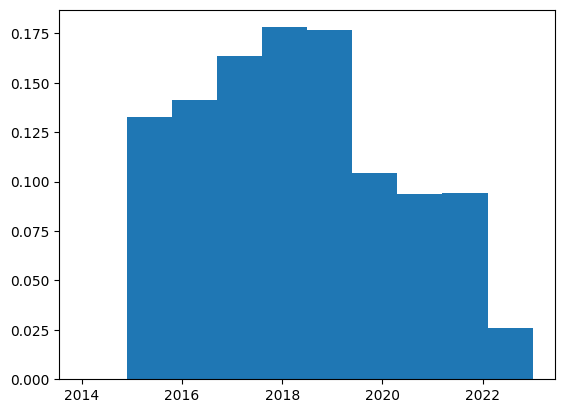

In [29]:
plt.hist(cars['year'], density=True)

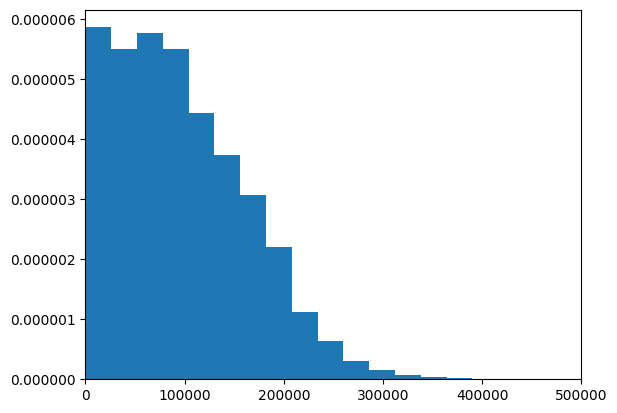

In [30]:
plt.hist(cars['mileage'], density = True, bins =100,)
plt.xlim(0,500000)
plt.ticklabel_format(style='plain', axis='y')

# Some simple overview

<BarContainer object of 2 artists>

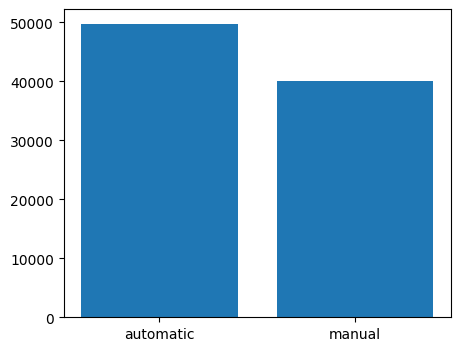

In [31]:
counts = cars['gearbox'].value_counts()
counts
plt.figure(figsize=(5,4))
plt.bar(counts.index,counts.values)

<BarContainer object of 2 artists>

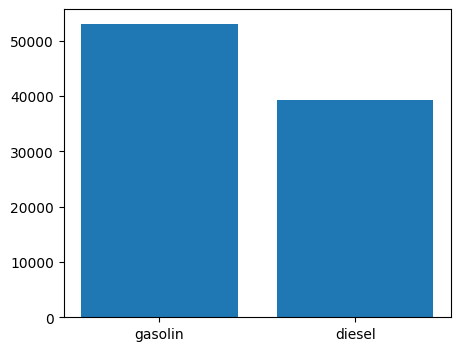

In [32]:
counts = cars['fuel_type'].value_counts()
counts
plt.figure(figsize=(5,4))
plt.bar(counts.index,counts.values)

<BarContainer object of 3 artists>

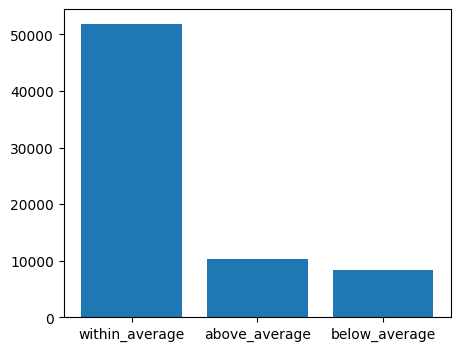

In [33]:
counts = cars['price_placement'].value_counts()
counts
plt.figure(figsize=(5,4))
plt.bar(counts.index,counts.values)

<BarContainer object of 2 artists>

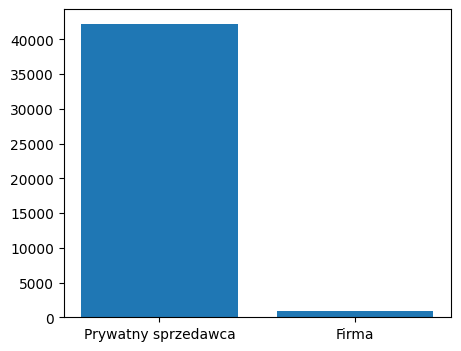

In [34]:
counts = cars['seller'].value_counts()
counts
plt.figure(figsize=(5,4))
plt.bar(counts.index,counts.values)

<BarContainer object of 16 artists>

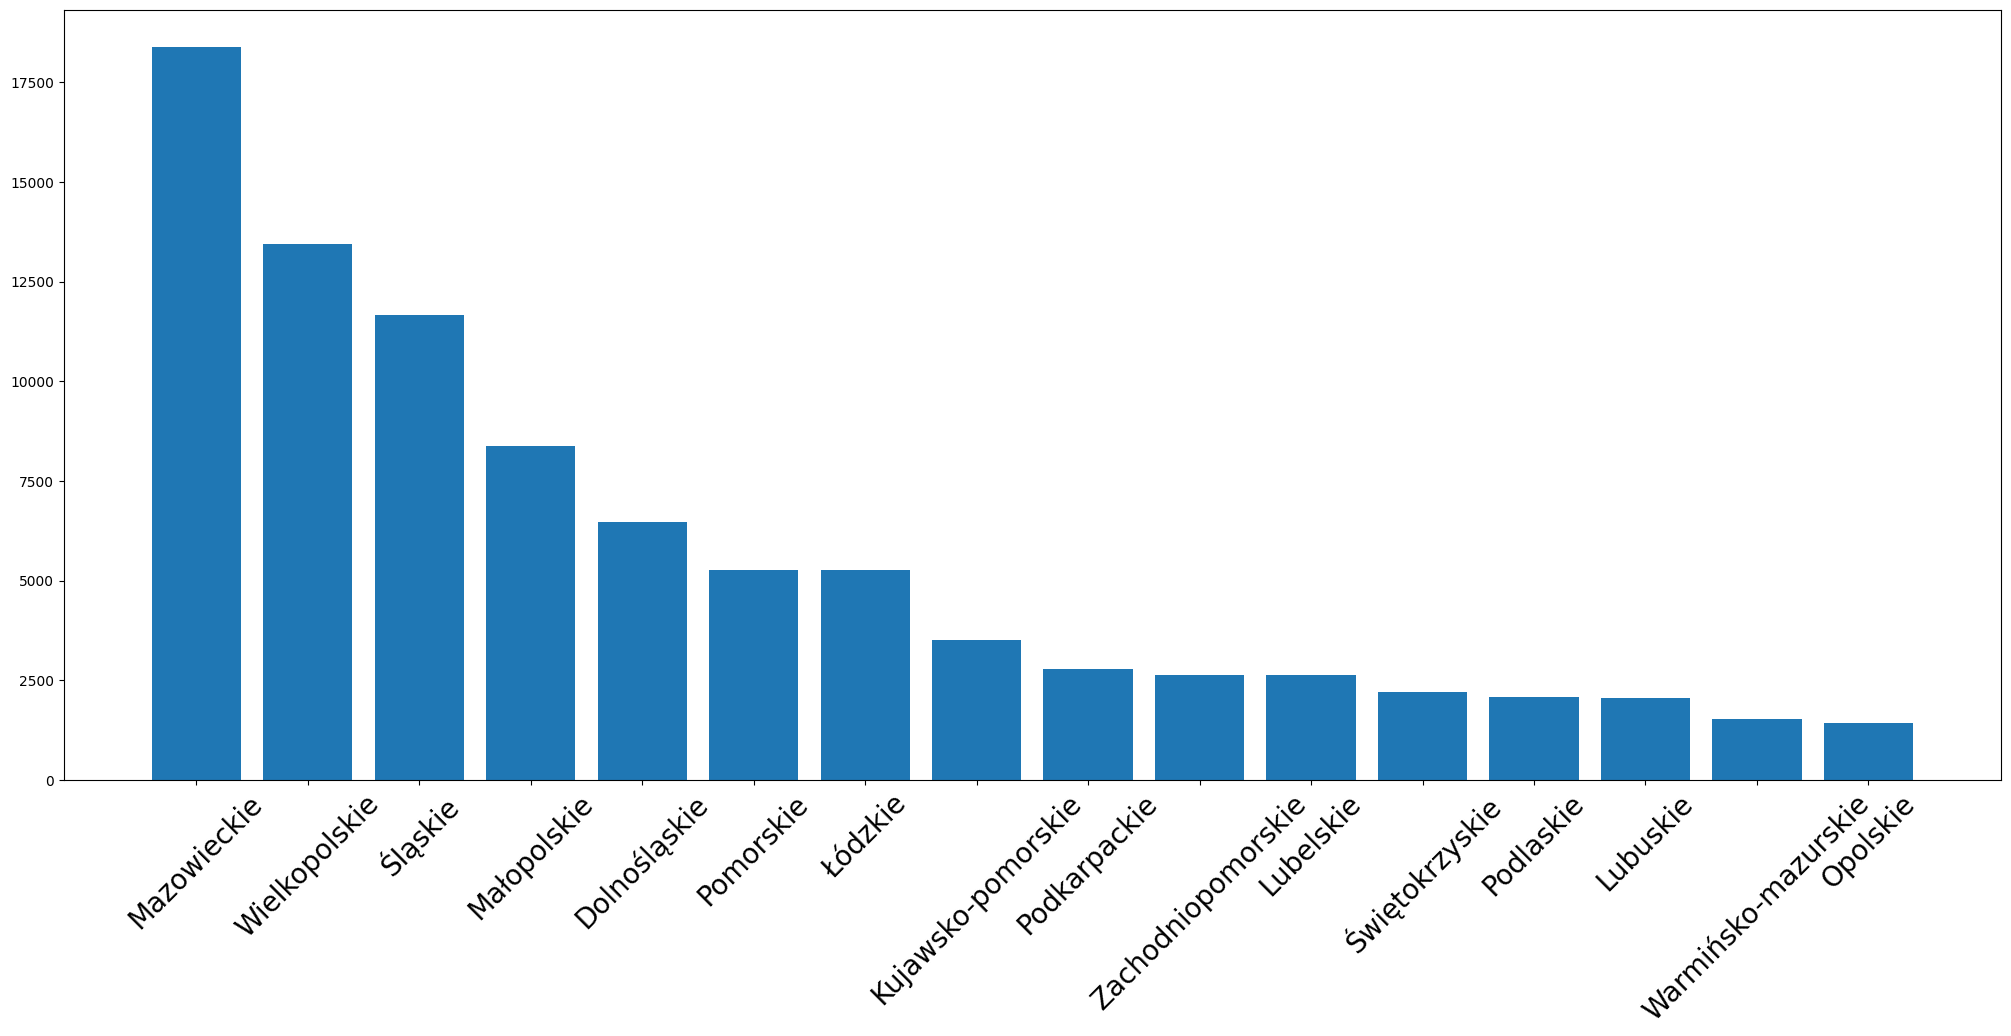

In [35]:
counts = cars['provinence'].value_counts()
counts
plt.figure(figsize=(25,10))
plt.xticks(rotation=45, fontsize=20)
plt.bar(counts.index,counts.values)

<BarContainer object of 10 artists>

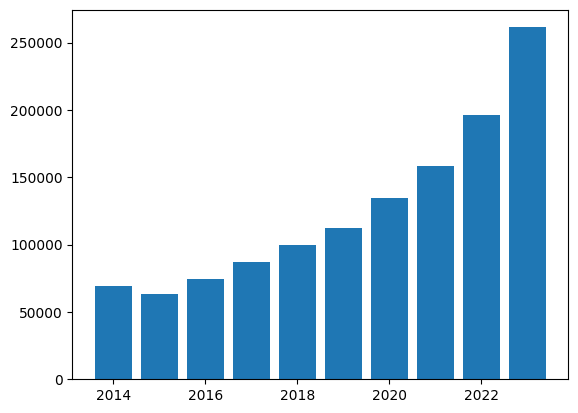

In [37]:
by_year = cars.groupby('year')['price'].mean()

plt.bar(by_year.index,by_year.values)

<BarContainer object of 10 artists>

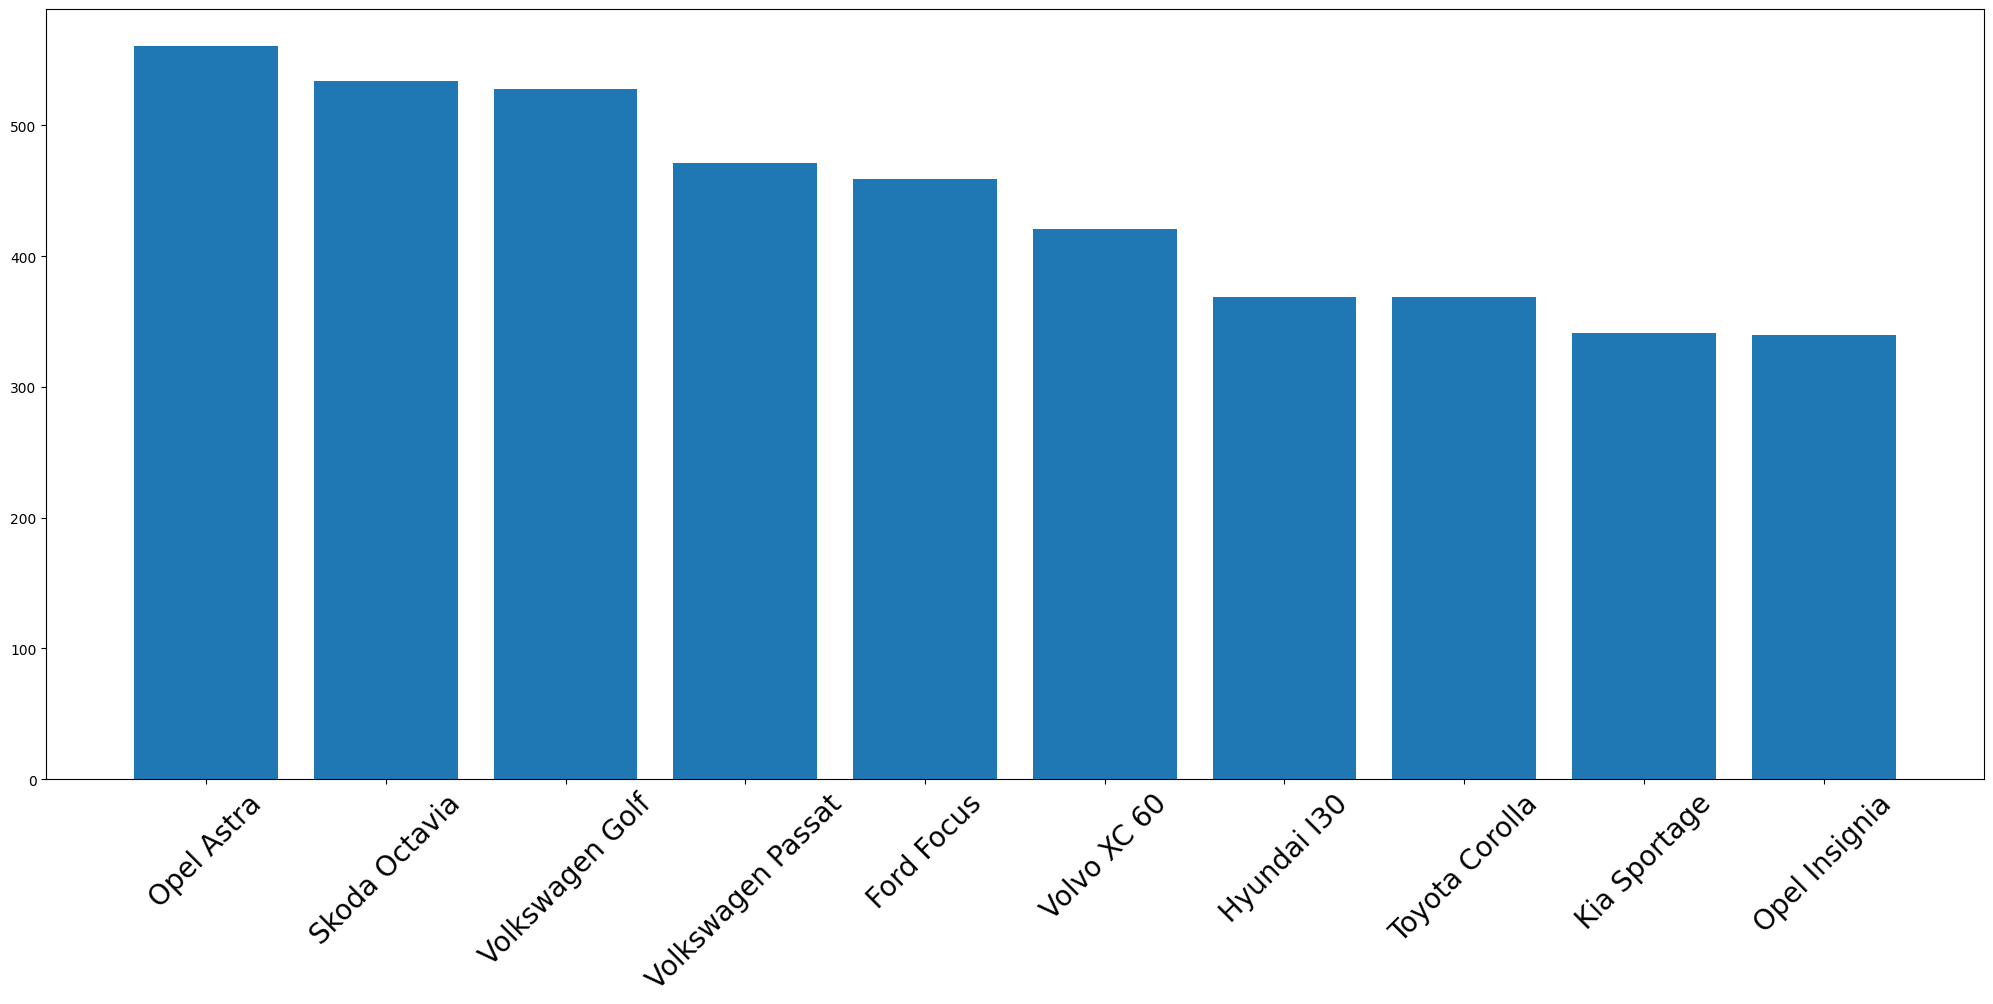

In [46]:
top_10_cars = cars.name.value_counts()[:10]
plt.figure(figsize=(25,10))
plt.xticks(rotation=45, fontsize=20)
plt.bar(top_10_cars.index,top_10_cars.values)


In [39]:
year_and_provinence = cars.groupby(['year','provinence'])['price'].mean().unstack()
year_and_provinence

provinence,Dolnośląskie,Kujawsko-pomorskie,Lubelskie,Lubuskie,Mazowieckie,Małopolskie,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Warmińsko-mazurskie,Wielkopolskie,Zachodniopomorskie,Łódzkie,Śląskie,Świętokrzyskie
year,,,,,,,,,,,,,,,,
2015,61977.288742,63635.636364,60872.915367,63658.094771,68090.420759,64481.640281,66014.818182,63093.490000,72982.011494,66526.906977,64558.534188,56839.292280,63334.586006,62349.608511,64210.811802,60651.512465
2016,69513.834420,68770.128049,75122.527716,77176.686275,82521.455378,75262.862454,71074.312139,79310.096618,83346.610169,76573.124224,67948.624365,66462.443325,76325.178674,73696.637143,73742.246850,68243.435583
2017,86241.491909,88127.495968,81727.677966,87890.806094,96267.004228,88244.290460,75707.497738,84753.126362,90214.796296,93770.459635,82082.750000,77712.146775,87583.588378,90017.879022,83228.004748,85640.323615
2018,101072.610358,96954.228471,94202.559701,101180.164875,107371.997649,101338.373250,87599.047393,103860.917676,109544.006098,108796.660471,96094.068826,90302.311731,103749.115385,100921.457245,92342.274530,97067.837920
2019,113248.433019,110381.941071,107920.101266,113756.609155,117259.073722,115858.016801,103232.004149,110974.536408,118173.907591,123568.004640,101121.187192,104257.897959,117346.378307,116538.674446,109432.732205,111811.304636
2020,143164.662609,122303.671827,115996.994924,140759.915663,150458.007437,131422.260514,134359.992481,121430.797710,132476.486911,152104.572314,125594.118110,116373.197004,147044.140351,136590.481188,129829.794011,152500.648352
2021,172678.243508,153281.271654,145523.947674,165765.578125,185360.648338,149038.827446,125976.609375,133419.744681,176717.772152,174645.351351,142584.474227,130067.660299,170669.725610,160503.229064,156371.456231,151346.537879
2022,198029.213468,203230.358434,182463.284768,170739.347561,224129.391080,168987.828788,154524.320000,181817.692737,232837.728324,212542.889558,180958.322785,173804.668951,218560.406167,177928.665012,181290.007569,229507.806630
2023,279442.616058,273856.027397,202396.826087,165576.803279,326675.405464,301737.185185,318113.315000,264731.956522,306859.055556,236701.682540,211419.320000,246625.833333,193779.573529,246623.133333,325268.464029,270104.491803


<Axes: xlabel='provinence', ylabel='year'>

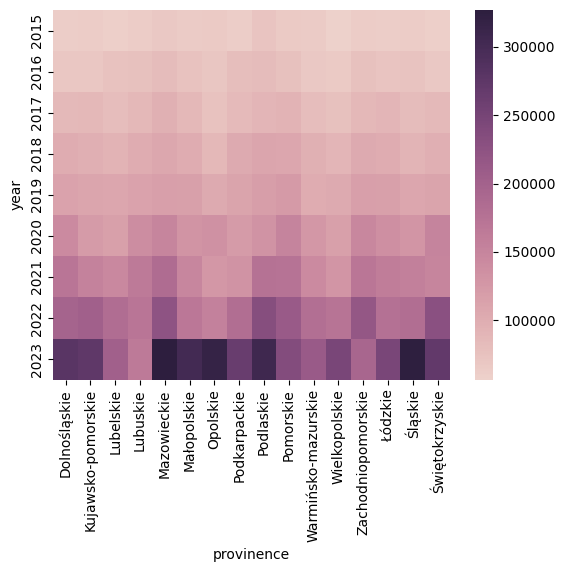

In [40]:
sns.heatmap(year_and_provinence, cmap=sns.cubehelix_palette(as_cmap=True))

In [41]:
year_and_provinence_2 = cars.groupby(['year','provinence'])['price'].count().unstack()
year_and_provinence_2


provinence,Dolnośląskie,Kujawsko-pomorskie,Lubelskie,Lubuskie,Mazowieckie,Małopolskie,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Warmińsko-mazurskie,Wielkopolskie,Zachodniopomorskie,Łódzkie,Śląskie,Świętokrzyskie
year,,,,,,,,,,,,,,,,
2015,755,407,449,306,1975,998,187,400,261,645,234,1697,343,705,1254,361
2016,767,492,451,306,2185,1076,173,414,295,644,197,1925,347,700,1349,326
2017,927,496,472,361,2602,1174,221,459,324,768,244,1969,413,777,1685,343
2018,1062,569,402,279,2978,1286,211,413,328,807,247,2114,468,842,1967,327
2019,1060,560,316,284,3033,1369,241,412,303,862,203,2058,378,857,2009,302
2020,575,323,197,166,1748,856,133,262,191,484,127,1335,228,505,1102,182
2021,593,254,172,128,1655,736,128,188,158,444,97,1204,164,406,971,132
2022,594,332,151,164,1861,660,100,179,173,498,158,934,227,403,1057,181
2023,137,73,23,61,366,216,40,46,36,126,25,216,68,75,278,61


<Axes: xlabel='provinence', ylabel='year'>

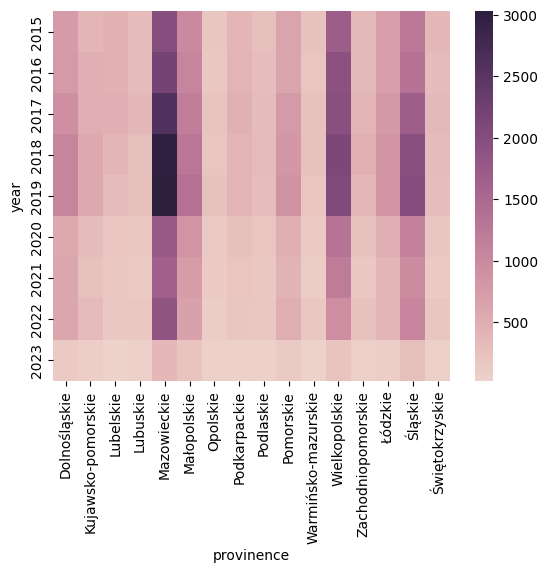

In [42]:
sns.heatmap(year_and_provinence_2, cmap=sns.cubehelix_palette(as_cmap=True))